# IMPORTS

In [7]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf

from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from keras.applications.vgg19 import decode_predictions as decode_vgg19

from IPython.core.display import display


In [8]:
FILE_1 = '01 Umbrella.jpg'
FILE_2 = '02 Couple.jpg'
FILE_3 = '03 Ocean.jpg'

In [9]:
pic = load_img(FILE_1, target_size= (299, 299))

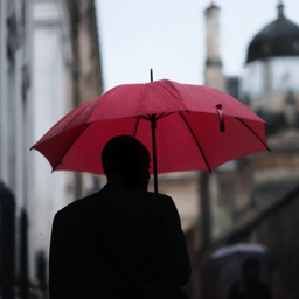

In [10]:
pic

In [11]:
pic_array = img_to_array(pic)

In [12]:
pic_array.shape

(299, 299, 3)

In [13]:
expanded = np.expand_dims(pic_array, axis = 0)
expanded.shape
#The input of the model requires an array with this shape

(1, 299, 299, 3)

In [14]:
preprocessed = preprocess_input(expanded)
#processing for the model

# Load InceptionResNet

In [15]:
%%time
inception_model = InceptionResNetV2(weights = 'imagenet')

225222656/225209952 [==============================] - 2s 0us/step
CPU times: user 4.87 s, sys: 1.15 s, total: 6.02 s
Wall time: 12.1 s


In [16]:
inception_model.graph = tf.compat.v1.get_default_graph()

# Makeing Predictions

In [17]:
prediction = inception_model.predict(preprocessed)
decode_predictions(prediction)

49152/35363 [=========================================] - 0s 0us/step


[[('n04507155', 'umbrella', 0.82924384),
  ('n03792972', 'mountain_tent', 0.0012268262),
  ('n04479046', 'trench_coat', 0.0011062943),
  ('n03788195', 'mosque', 0.0010572344),
  ('n03220513', 'dome', 0.0010310981)]]

In [18]:
def abc( File):
  pic = load_img(File, target_size= (299, 299))
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array, axis = 0)
  preprocessed = preprocess_input(expanded)
  prediction = inception_model.predict(preprocessed)
  a = decode_predictions(prediction)
  b = display(pic)

  return a, b
  

#Think how to print pic along with it
  


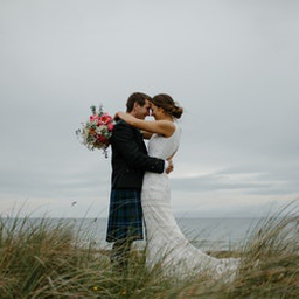

([[('n10148035', 'groom', 0.7042374),
   ('n03450230', 'gown', 0.11669636),
   ('n11879895', 'rapeseed', 0.016582685),
   ('n09421951', 'sandbar', 0.012790694),
   ('n03534580', 'hoopskirt', 0.007287803)]],
 None)

In [19]:
abc(FILE_2)

In [20]:
vgg19_model = VGG19()

574726144/574710816 [==============================] - 5s 0us/step


In [21]:
def abcd( File):
  pic = load_img(File, target_size= (224, 224))
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array, axis = 0)
  preprocessed = preprocess_input_vgg19(expanded)
  prediction = vgg19_model.predict(preprocessed)
  a = decode_vgg19(prediction)

  return a

In [22]:
abcd(FILE_2)

[[('n10148035', 'groom', 0.21170984),
  ('n02100735', 'English_setter', 0.044719342),
  ('n09399592', 'promontory', 0.036268882),
  ('n03450230', 'gown', 0.035969347),
  ('n02102040', 'English_springer', 0.03592257)]]